# TASKS:

1.) FIND DISTRIBUTION OF OBSERVATIONS BY BRAND

2.) FIND DISTRIBUTION OF OBSERVATIONS BY YEAR

3.) FIND DISTRIBUTION OF OBSERVATIONS BY STATE

4.) FIND DISTRIBUTION OF OBSERVATIONS BY COLOR

5.) FIND DISTRIBUTION OF PRICE BY BRAND

6.) FIND DISTRIBUTION OF PRICE BY YEAR

7.) FIND DISTRIBUTION OF PRICE BY STATE

8.) FIND DISTRIBUTION OF PRICE BY COLOR

9.) CREATE A MODEL THAT PREDICTS PRICE

TODO: CLEAN UP THE VISUALS SO THAT THE LABELS AREN'T OVERLAPPING

---

IMPORTING LIBRARIES

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use('fivethirtyeight')

CHECKING OUT THE INITIAL DATA

In [3]:
# --------------------
# CREATING INITIAL DF
# --------------------
df1 = pd.read_csv('./input/USA_cars_datasets.csv')
df1.drop(columns=['Unnamed: 0'],inplace=True,axis=1)
df1.isnull().sum()
df1.head()

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [4]:
# ----------
# COLUMNS
# ----------
df1.columns

Index(['price', 'brand', 'model', 'year', 'title_status', 'mileage', 'color',
       'vin', 'lot', 'state', 'country', 'condition'],
      dtype='object')

In [5]:
# ------------
# DATA TYPES
# ------------
df1.dtypes

price             int64
brand            object
model            object
year              int64
title_status     object
mileage         float64
color            object
vin              object
lot               int64
state            object
country          object
condition        object
dtype: object

In [6]:
# ------------------
# DATA DESCRIPTION
# ------------------
df1.describe()

,price,year,mileage,lot
count,2499.000000,2499.000000,2.499000e+03,2.499000e+03
mean,18767.671469,2016.714286,5.229869e+04,1.676914e+08
std,12116.094936,3.442656,5.970552e+04,2.038772e+05
min,0.000000,1973.000000,0.000000e+00,1.593488e+08
25%,10200.000000,2016.000000,2.146650e+04,1.676253e+08
50%,16900.000000,2018.000000,3.536500e+04,1.677451e+08
75%,25555.500000,2019.000000,6.347250e+04,1.677798e+08
max,84900.000000,2020.000000,1.017936e+06,1.678055e+08


DATA WRANGLING

In [7]:
# -------------------------------------------
# CREATING AN AVERAGE PRICE COLUMN BY BRAND
# -------------------------------------------
df1['average_price'] = df1.groupby('brand')['price'].transform('mean')
df1['average_price']

0        6300.000000
1       21666.888259
2       17781.988426
3       21666.888259
4       18669.952862
            ...     
2494    12065.820513
2495    12065.820513
2496    12065.820513
2497    12065.820513
2498    12065.820513
Name: average_price, Length: 2499, dtype: float64

In [8]:
# -----------------------------------------------
# FINDING OUTLIERS THAT HAVE A PRICE BELOW 100,
# 0 IN MANY CASES. THESE OBSERVATIONS ARE
# SKEWING THE DATA
# -----------------------------------------------
df2 = df1[df1['price'] <= 100]
df2


,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,average_price
141,0,dodge,van,2008,salvage insurance,177948.0,orange,2d8hn44h88r669549,167756157,utah,usa,2 days left,17781.988426
144,0,dodge,door,2014,salvage insurance,123660.0,silver,1c3cdzab0en111068,167756167,utah,usa,2 days left,17781.988426
196,0,ford,mpv,2017,clean vehicle,76858.0,white,1fbax2cv0hkb32599,167656523,texas,usa,2 days left,21666.888259
206,25,chevrolet,vehicl,2020,salvage insurance,7232.0,black,2gnaxkev6l6128374,167756877,kentucky,usa,3 days left,18669.952862
209,25,chrysler,door,2005,salvage insurance,151815.0,silver,2c3ja43r35h179032,167757193,massachusetts,usa,3 days left,13686.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,0,ford,door,2008,salvage insurance,145483.0,red,1fmcu03128kc80487,167357813,oklahoma,usa,17 hours left,21666.888259
530,0,chevrolet,door,2003,salvage insurance,194673.0,gray,1gndt13s632267445,167650636,texas,usa,17 hours left,18669.952862
534,75,ford,door,2007,salvage insurance,154989.0,blue,3fahp06z07r118828,167357820,oklahoma,usa,17 hours left,21666.888259
541,25,chevrolet,pickup,2010,salvage insurance,149189.0,white,3gcrkse37ag234620,167650663,colorado,usa,17 hours left,18669.952862


In [9]:
# ----------------------------------------------------------------
# REPLACING THE df2 PRICES WITH THE AVERAGE PRICE FOR THAT BRAND
# ----------------------------------------------------------------
df2['price'] = df2['average_price']
df2

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,average_price
141,17781.988426,dodge,van,2008,salvage insurance,177948.0,orange,2d8hn44h88r669549,167756157,utah,usa,2 days left,17781.988426
144,17781.988426,dodge,door,2014,salvage insurance,123660.0,silver,1c3cdzab0en111068,167756167,utah,usa,2 days left,17781.988426
196,21666.888259,ford,mpv,2017,clean vehicle,76858.0,white,1fbax2cv0hkb32599,167656523,texas,usa,2 days left,21666.888259
206,18669.952862,chevrolet,vehicl,2020,salvage insurance,7232.0,black,2gnaxkev6l6128374,167756877,kentucky,usa,3 days left,18669.952862
209,13686.111111,chrysler,door,2005,salvage insurance,151815.0,silver,2c3ja43r35h179032,167757193,massachusetts,usa,3 days left,13686.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,21666.888259,ford,door,2008,salvage insurance,145483.0,red,1fmcu03128kc80487,167357813,oklahoma,usa,17 hours left,21666.888259
530,18669.952862,chevrolet,door,2003,salvage insurance,194673.0,gray,1gndt13s632267445,167650636,texas,usa,17 hours left,18669.952862
534,21666.888259,ford,door,2007,salvage insurance,154989.0,blue,3fahp06z07r118828,167357820,oklahoma,usa,17 hours left,21666.888259
541,18669.952862,chevrolet,pickup,2010,salvage insurance,149189.0,white,3gcrkse37ag234620,167650663,colorado,usa,17 hours left,18669.952862


In [10]:
# ---------------------------------------------------------
# DROPPING THE ROWS FROM df1 WHERE PRICE IS LESS THAN 100
# ---------------------------------------------------------
drop_index = df1[df1['price'] <= 100].index
df1.drop(drop_index, inplace=True)

In [11]:
# ------------------------------------------------------
# CREATING A THIRD DF. df3 = df1 + df2
# ------------------------------------------------------
df3 = pd.concat([df1, df2], ignore_index=True)
df3

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,average_price
0,6300.000000,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left,6300.000000
1,2899.000000,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left,21666.888259
2,5350.000000,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left,17781.988426
3,25000.000000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left,21666.888259
4,27700.000000,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left,18669.952862
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,21666.888259,ford,door,2008,salvage insurance,145483.0,red,1fmcu03128kc80487,167357813,oklahoma,usa,17 hours left,21666.888259
2495,18669.952862,chevrolet,door,2003,salvage insurance,194673.0,gray,1gndt13s632267445,167650636,texas,usa,17 hours left,18669.952862
2496,21666.888259,ford,door,2007,salvage insurance,154989.0,blue,3fahp06z07r118828,167357820,oklahoma,usa,17 hours left,21666.888259
2497,18669.952862,chevrolet,pickup,2010,salvage insurance,149189.0,white,3gcrkse37ag234620,167650663,colorado,usa,17 hours left,18669.952862


1.) FIND DISTRIBUTION OF OBSERVATIONS BY BRAND

In [12]:
# -------------------------------------------------------------
# CHECKING THE VALUE COUNTS BY BRAND
# -------------------------------------------------------------
df3['brand'].value_counts()

ford               1235
dodge               432
nissan              312
chevrolet           297
gmc                  42
jeep                 30
chrysler             18
bmw                  17
hyundai              15
buick                13
kia                  13
honda                12
infiniti             12
cadillac             10
mercedes-benz        10
heartland             5
audi                  4
land                  4
peterbilt             4
acura                 3
lincoln               2
lexus                 2
mazda                 2
harley-davidson       1
ram                   1
jaguar                1
toyota                1
maserati              1
Name: brand, dtype: int64

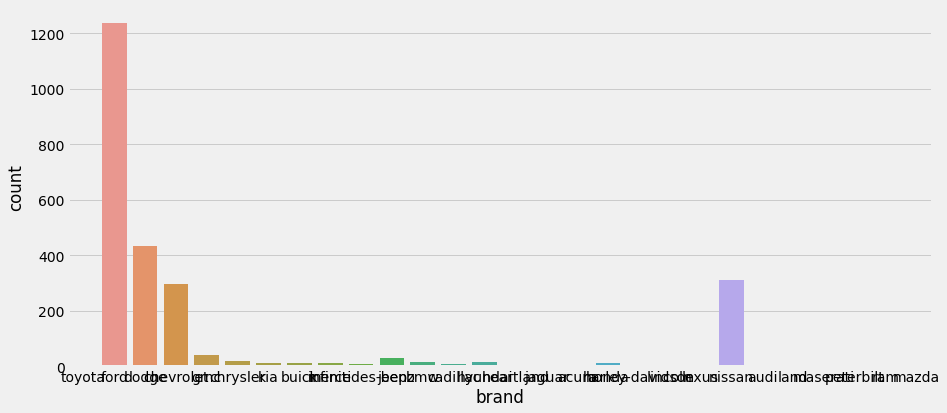

In [13]:
# --------------------------------------------------
# PLOTTING THE BREAKDOWN OF THE CARS SOLD BY BRAND
# --------------------------------------------------
fig = plt.figure(figsize=(12,5))
ax = fig.add_axes([0,0,1,1])
sns.countplot(x='brand', data=df3, ax=ax)

2.) FIND DISTRIBUTION OF OBSERVATIONS BY YEAR

In [14]:
# ------------------------------
# COUNT OF DATA POINTS BY YEAR
# ------------------------------
# df3.groupby('year')['year'].counts()
df3['year'].value_counts()

2019    892
2018    395
2017    377
2016    203
2015    196
2014    104
2013     86
2012     72
2020     48
2011     23
2008     18
2010     13
2009     11
2003      9
2006      8
2004      6
2005      6
2007      6
2001      5
2000      4
1998      4
1997      2
2002      2
1996      2
1994      2
1999      1
1973      1
1993      1
1995      1
1984      1
Name: year, dtype: int64

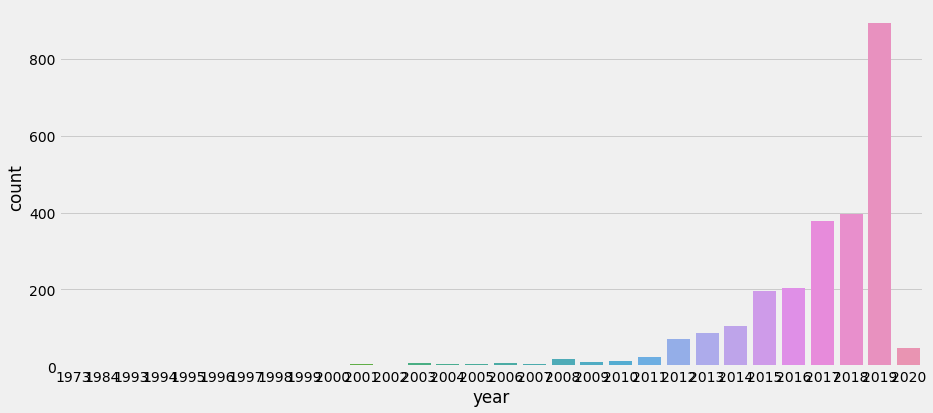

In [15]:
# --------------------------------------------------
# PLOTTING THE BREAKDOWN OF THE CARS SOLD BY YEAR
# --------------------------------------------------
fig = plt.figure(figsize=(12,5))
ax = fig.add_axes([0,0,1,1])
sns.countplot(x='year', data=df3, ax=ax)

In [16]:
# ---------------------------------------------
# CREATING A NEW DF THAT ONLY CONTAINS DATA
# FROM THE LAST 6 YEARS
# ---------------------------------------------
df4 = df3[np.logical_or.reduce([
    df3['year']==2015,
    df3['year']==2016,
    df3['year']==2017,
    df3['year']==2018,
    df3['year']==2019,
    df3['year']==2020]
)]
df4.head()

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,average_price
2,5350.0,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left,17781.988426
4,27700.0,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left,18669.952862
5,5700.0,dodge,mpv,2018,clean vehicle,45561.0,white,2c4rdgeg9jr237989,167655771,texas,usa,2 days left,17781.988426
7,13350.0,gmc,door,2017,clean vehicle,23525.0,gray,1gks2gkc3hr326762,167692494,california,usa,20 hours left,10657.380952
8,14600.0,chevrolet,malibu,2018,clean vehicle,9371.0,silver,1g1zd5st5jf191860,167763267,florida,usa,22 hours left,18669.952862


In [28]:
# ------------------------------------------
# LOOKING AT THE BREAKDOWN OF THE CAR DATA
# IN THE NEW DF BY YEAR
# ------------------------------------------
# df4.groupby('year')['year'].count()
df4['year'].value_counts()

2019    892
2018    395
2017    377
2016    203
2015    196
2020     48
Name: year, dtype: int64

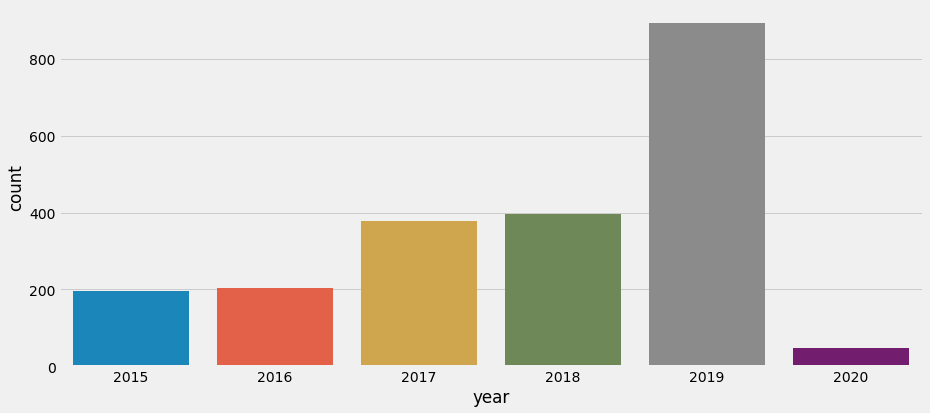

In [18]:
# ------------------------------------------------------
# PLOTTING THE BREAKDOWN OF THE MORE PREVALENT YEARS
# ------------------------------------------------------
fig = plt.figure(figsize=(12,5))
ax = fig.add_axes([0,0,1,1])
sns.countplot(x='year', data=df4, ax=ax)

3.) FIND DISTRIBUTION OF OBSERVATIONS BY STATE

In [24]:
# ---------------------------------------------------
# LOOKING AT THE BREAKDOWN OF THE CAR DATA BY STATE
# ---------------------------------------------------
# df4.groupby('state')['state'].count()
df4['state'].value_counts()

pennsylvania      266
florida           200
california        172
texas             161
michigan          157
north carolina    142
minnesota         109
illinois           95
nevada             80
wisconsin          79
virginia           79
new jersey         72
oklahoma           58
south carolina     54
new york           47
georgia            39
missouri           35
arizona            29
ohio               29
massachusetts      23
connecticut        22
oregon             21
mississippi        17
tennessee          17
alabama            15
west virginia      15
colorado           11
washington         11
indiana            10
louisiana           9
kentucky            7
ontario             7
new hampshire       4
nebraska            4
new mexico          4
arkansas            4
kansas              2
vermont             2
idaho               1
utah                1
rhode island        1
Name: state, dtype: int64

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  import sys


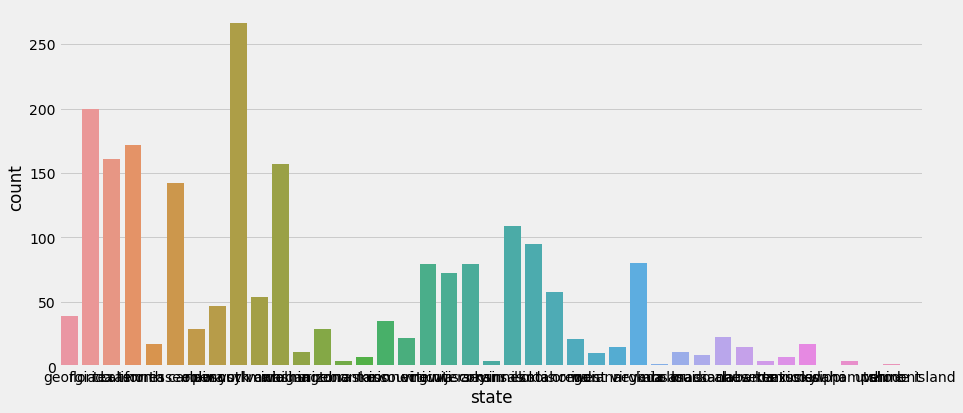

In [23]:
# ------------------------------------------------------
# PLOTTING THE BREAKDOWN BY STATE
# ------------------------------------------------------
fig = plt.figure(figsize=(12,5))
ax = fig.add_axes([0,0,1,1])
sns.countplot(x='state', data=df4, ax=ax)

4.) FIND DISTRIBUTION OF OBSERVATIONS BY COLOR

In [29]:
# ---------------------------------------------------
# LOOKING AT THE BREAKDOWN OF THE CAR DATA BY COLOR
# ---------------------------------------------------
df4['color'].value_counts()

white                                      590
black                                      452
gray                                       345
silver                                     261
red                                        163
blue                                       126
no_color                                    52
charcoal                                    18
green                                       15
gold                                        11
orange                                      11
brown                                        8
magnetic metallic                            6
yellow                                       5
shadow black                                 5
ingot silver metallic                        4
oxford white                                 4
beige                                        4
super black                                  3
triple yellow tri-coat                       3
cayenne red                                  2
tuxedo black 

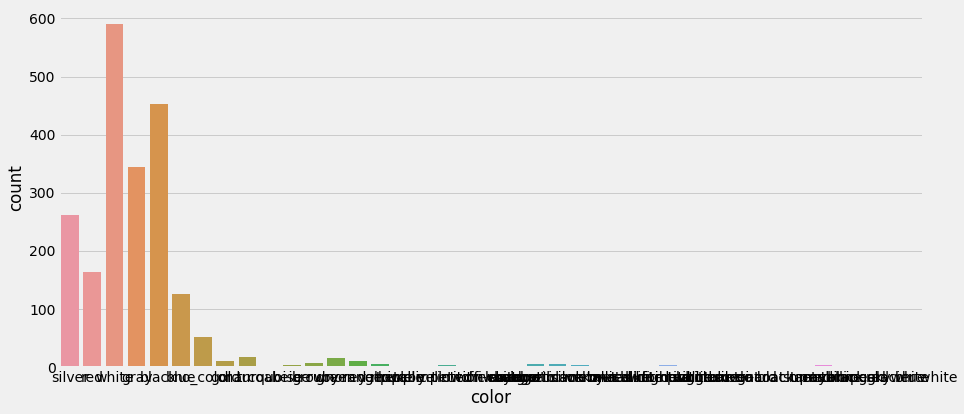

In [30]:
# ------------------------------------------------------
# PLOTTING THE BREAKDOWN BY COLOR
# ------------------------------------------------------
fig = plt.figure(figsize=(12,5))
ax = fig.add_axes([0,0,1,1])
sns.countplot(x='color', data=df4, ax=ax)

5.) FIND DISTRIBUTION OF PRICE BY BRAND